# Обзор алгоритмов машинного обучения

## 1. Особенности работы алгоритмов

Представьте графически работу различных алгортмов машинного обучения и сохраните картинки в отчете (удобней всего в google-docs). Для этого:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Возьмите датасет вашего варианта (см. список ниже). Найдите два **количественных** признака, от которых сильнее всего зависит целевой. Далее работайте с датасетом, содержащим только эти два признака и целевой.

In [4]:
file_path = 'bodyfat.csv'
data = pd.read_csv(file_path)
print(data.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [7]:
target = 'Neck'
n = 38
data['Neck_Binary'] = (data[target] <= n).astype(int)
print(data.head())
quantitative_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
quantitative_features.remove(target)

correlation_matrix = data[quantitative_features + ['Neck_Binary']].corr()

binary_neck_correlation = correlation_matrix['Neck_Binary'].sort_values(ascending=False)

print(binary_neck_correlation)

target = ['Neck_Binary', 'Weight', 'Chest']

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  Neck_Binary  
0  37.3   21.9    32.0     27.4   17.1            1  
1  37.3   23.4    30.5     28.9   18.2            0  
2  38.9   24.0    28.8     25.2   16.6            1  
3  37.3   22.8    32.4     29.4   18.2            1  
4  42.2   24.0    32.2     27.7   17.7            1  
Neck_Binary    1.000000
Density        0.426435
Age           -0.093293
Height        -0.213504
Ankle         -0.363244
BodyFat       -0.440380
Thigh         -0.506920
Knee          -0.511106
For

* Постройте график рассеяния всей выборки (отобразив цветом целевой класс). 

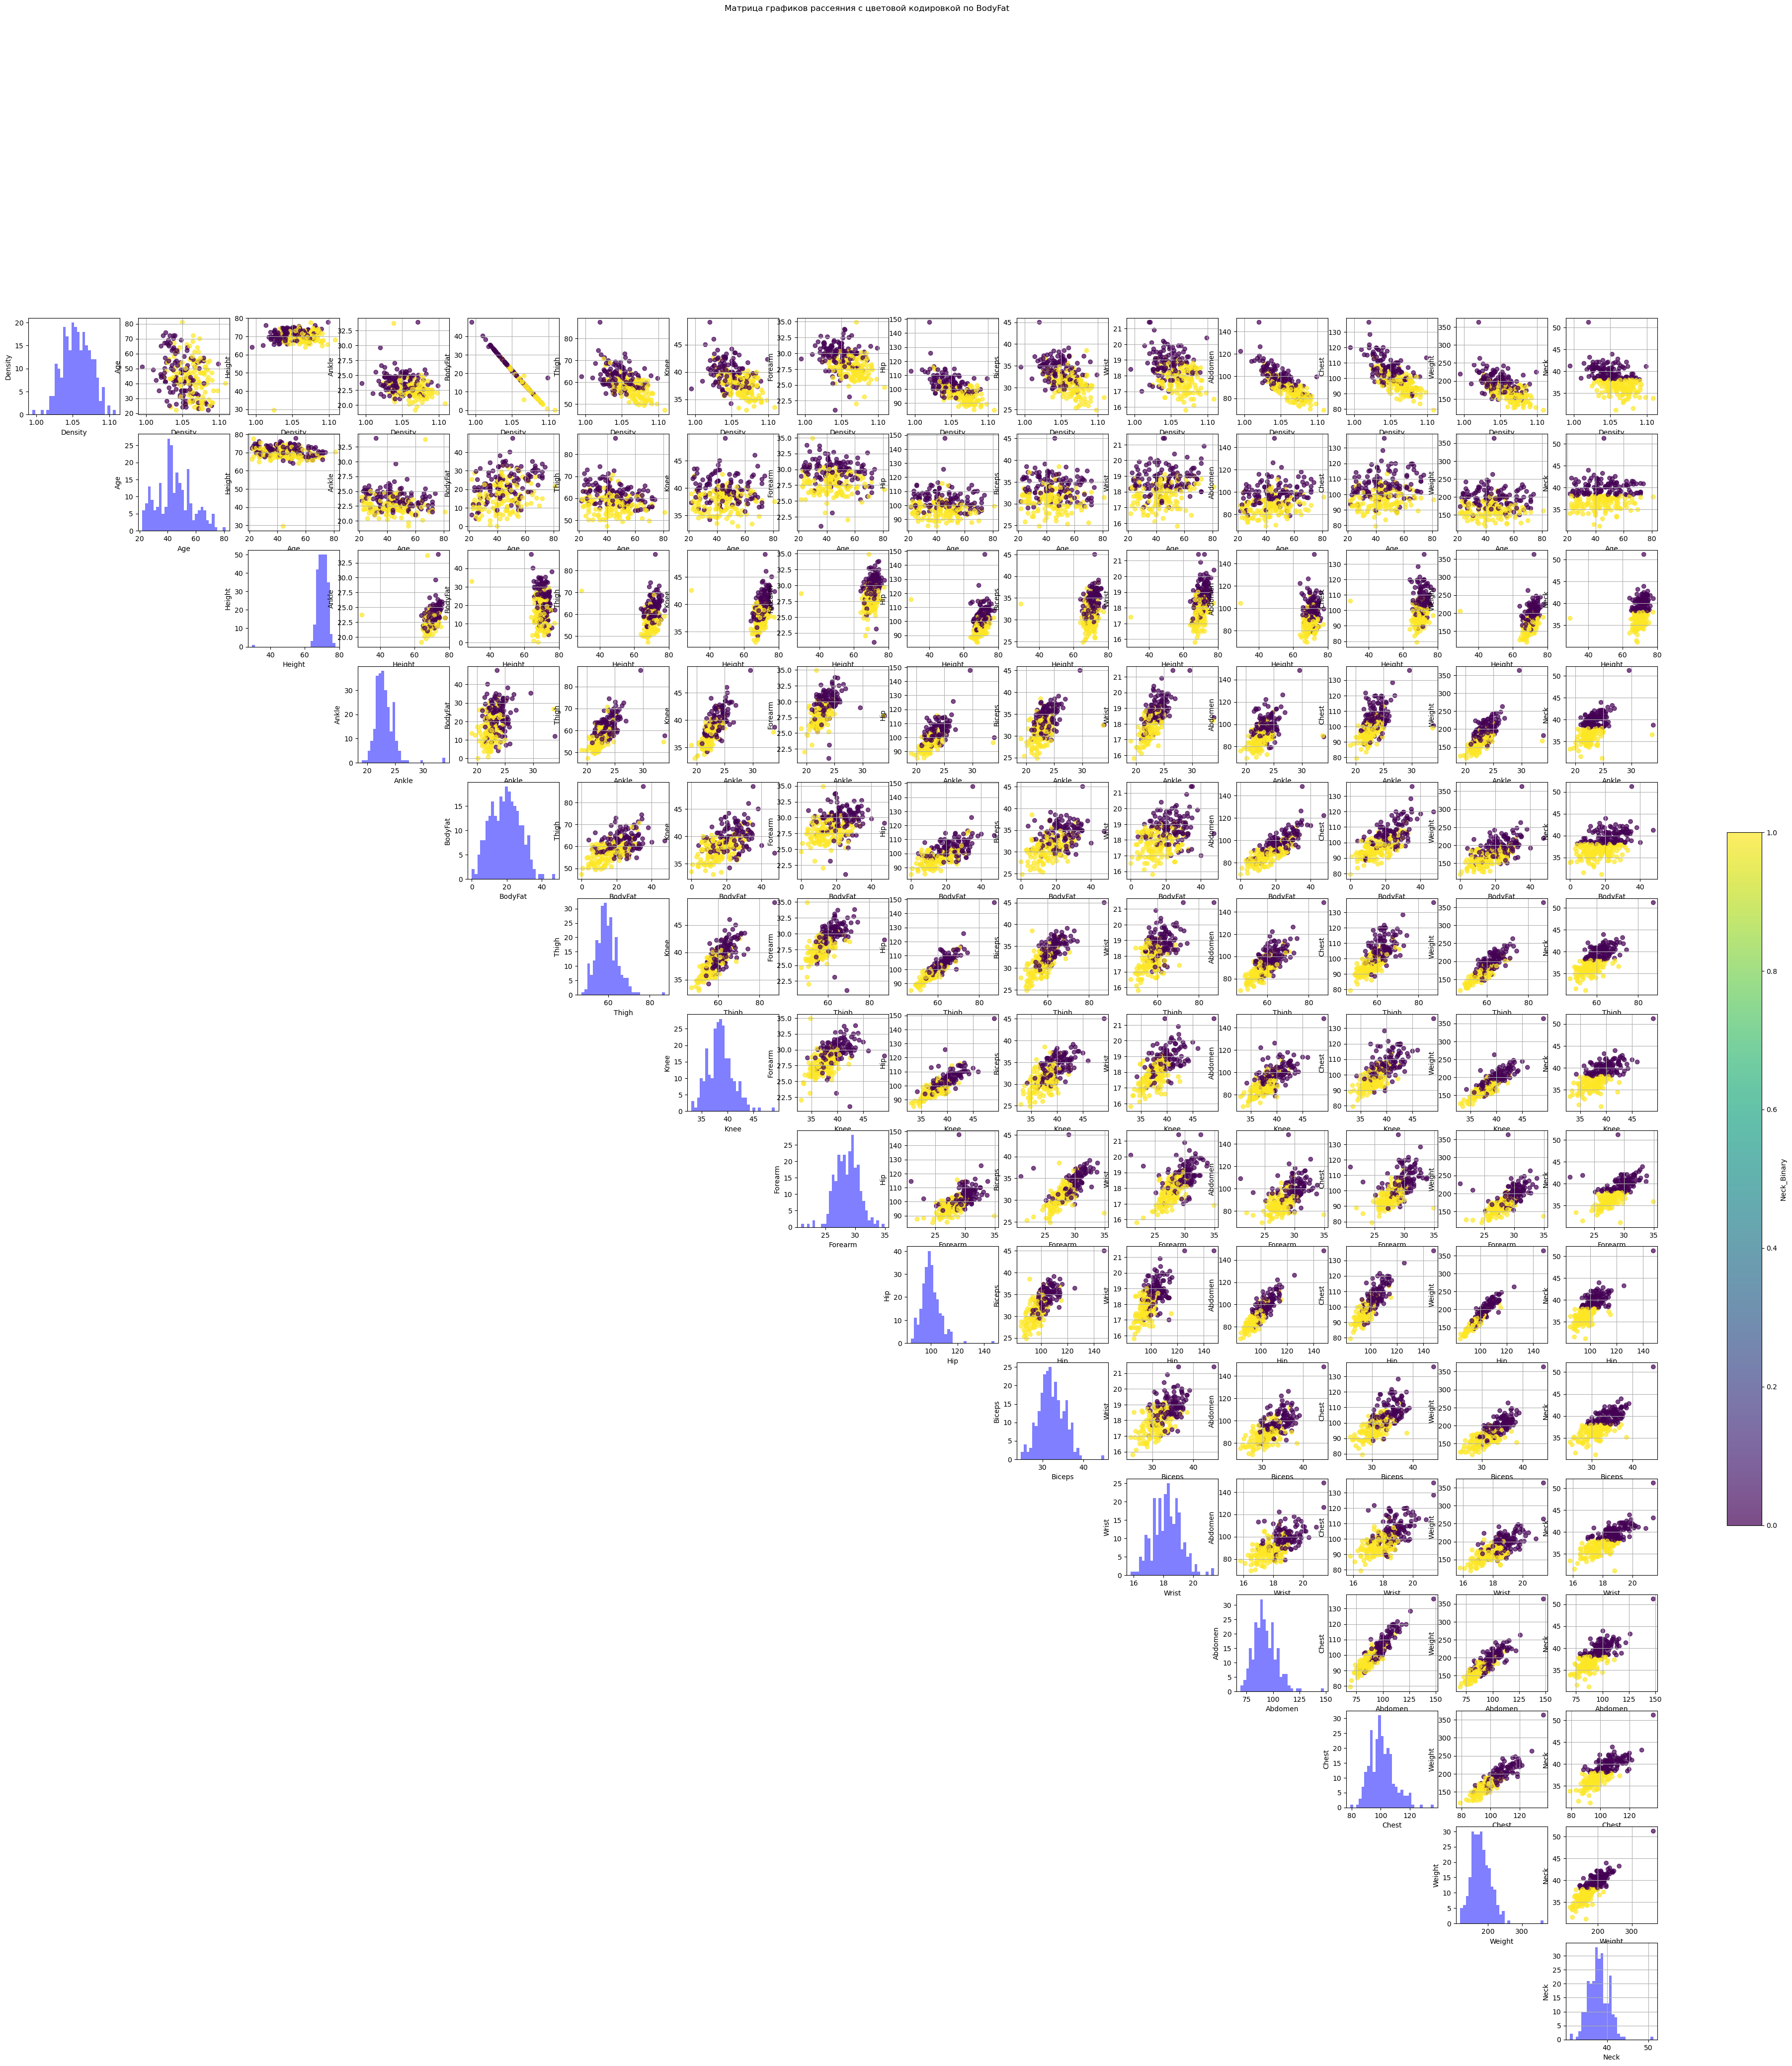

In [10]:
'''
quantitative_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
''' 
quantitative_features = [
'Density',
'Age',
'Height',
'Ankle',
'BodyFat',
'Thigh',
'Knee',
'Forearm',
'Hip',
'Biceps',
'Wrist',
'Abdomen',
'Chest',
'Weight',
'Neck'
]
#'''

num_features = len(quantitative_features)
fig, axes = plt.subplots(num_features, num_features, figsize=(num_features*3, num_features*3))


for i, feature_x in enumerate(quantitative_features):
    for j, feature_y in enumerate(quantitative_features):
        

        if i <j:
            scatter = axes[i, j].scatter(data[feature_x], data[feature_y], c=data['Neck_Binary'], cmap='viridis', alpha=0.7)
            axes[i, j].set_xlabel(feature_x)
            axes[i, j].set_ylabel(feature_y)
            axes[i, j].grid()


        elif i > j:
            axes[i, j].axis('off')
        
        else:
            axes[i, j].hist(data[feature_x], bins=30, color='blue', alpha=0.5)
            axes[i, j].set_xlabel(feature_x)
            axes[i, j].set_ylabel(feature_y)

# Настраиваем цветовую карту
cbar = fig.colorbar(scatter, ax=axes[:, :], orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Neck_Binary')
plt.suptitle('Матрица графиков рассеяния с цветовой кодировкой по BodyFat', y=1.02)
plt.grid()
plt.show()

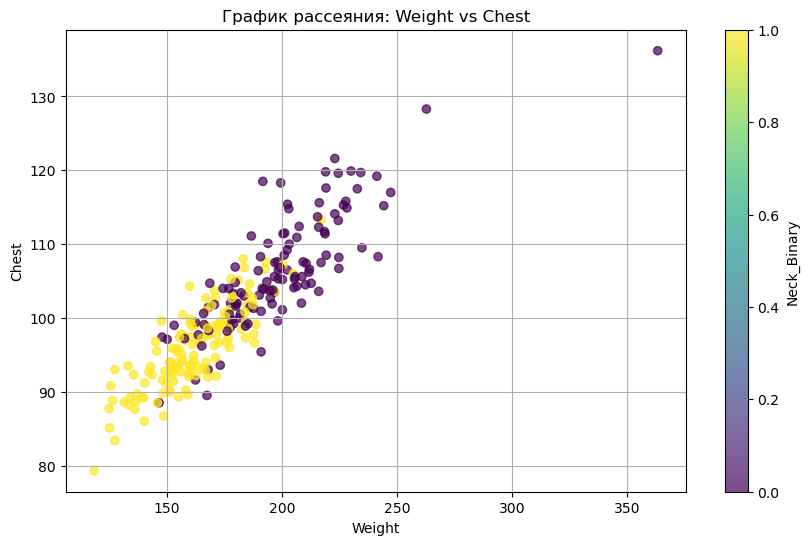

In [11]:
# График рассеяния для Abdomen и Chest
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data[target[1]], data[target[2]], c=data[target[0]], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Neck_Binary')
plt.title(f'График рассеяния: {target[1]} vs {target[2]}')
plt.xlabel(target[1])
plt.ylabel(target[2])
plt.grid()
plt.show()

* Постройте карты работы следующих алгоритмов для разных значений параметров: sklearn.tree.DecisionTreeClassifier, sklearn.neighbors.KNeighborsClassifier. Подберите параметры так, чтобы алгоритм оказался недообучен и переобучен. Отобразите те области карты, на которых лучше всего видна степень обученности модели и разместите две картинки в один ряд в отчете. При помощи кросс-валидации подтвердите факты недообучения и переобучения алгоритмов для подобранных вами параметров.

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [14]:
X = data[[target[1], target[2]]]
y = data[target[0]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [57]:
# Настройка параметров для недообучения и переобучения
n=120

dtc_parameters = [i for i in range(1,n+1)]
knn_parameters = [i for i in range(1,n+1)]

In [105]:
def DecisionTreeClassifierFunc(data, x, y, label, depth):
    model = DecisionTreeClassifier(max_depth=depth)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    xlim = (data[x].min(), data[x].max())
    ylim = (data[y].min(), data[y].max())
    model.fit(data.loc[:,[x,y]], data[label])
    grid_x = np.linspace(*xlim, 100)
    grid_y = np.linspace(*ylim, 100)
    xx, yy = np.meshgrid(grid_x, grid_y)
    grid = np.c_[xx.ravel(), yy.ravel()]
    # в следующей строчке с помощью функции isinstance хорошо бы проверить тип объекта model и в зависимости от этого вызывать метод predict, predict_proba или decision_function
    prediction = model.predict_proba(grid)[:,1].reshape(xx.shape)
    ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))
    ax.set_title(f'Decision Tree Classifier - {depth}')
    
    ax = sns.scatterplot(data=data, x=x, y=y, hue=label, palette="rocket", ax=ax)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
# Обучение и кросс-валидация для DecisionTree
dtc_scores = []
for max_depth in dtc_parameters:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_scaled, y, cv=5)
    dtc_scores.append(scores.mean())

for i in range(n):
    print(f'{i+1:3} | {dtc_scores[i]:.5f}')

  1 | 0.77788
  2 | 0.77388
  3 | 0.78996
  4 | 0.77380
  5 | 0.75796
  6 | 0.74204
  7 | 0.73443
  8 | 0.70259
  9 | 0.71443
 10 | 0.71443
 11 | 0.71451
 12 | 0.71051
 13 | 0.71843
 14 | 0.72235
 15 | 0.71043
 16 | 0.71443
 17 | 0.69859
 18 | 0.71843
 19 | 0.71059
 20 | 0.71443
 21 | 0.70659
 22 | 0.70667
 23 | 0.70259
 24 | 0.71451
 25 | 0.71843
 26 | 0.70659
 27 | 0.71043
 28 | 0.70667
 29 | 0.71843
 30 | 0.71843
 31 | 0.70251
 32 | 0.71043
 33 | 0.71035
 34 | 0.71451
 35 | 0.71843
 36 | 0.71443
 37 | 0.71435
 38 | 0.71835
 39 | 0.71051
 40 | 0.71043
 41 | 0.71451
 42 | 0.72235
 43 | 0.71435
 44 | 0.70259
 45 | 0.71059
 46 | 0.71051
 47 | 0.71043
 48 | 0.70659
 49 | 0.70651
 50 | 0.71059
 51 | 0.70667
 52 | 0.71451
 53 | 0.70259
 54 | 0.71059
 55 | 0.71843
 56 | 0.71451
 57 | 0.70651
 58 | 0.71451
 59 | 0.71051
 60 | 0.71059
 61 | 0.70259
 62 | 0.70275
 63 | 0.70267
 64 | 0.72235
 65 | 0.72235
 66 | 0.70651
 67 | 0.70259
 68 | 0.71043
 69 | 0.71043
 70 | 0.71043
 71 | 0.71451
 72 | 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


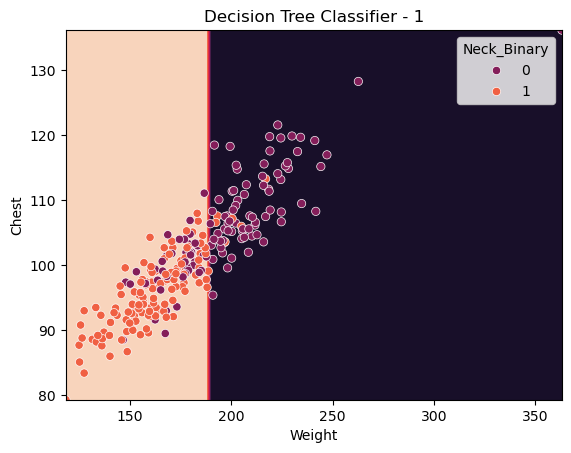

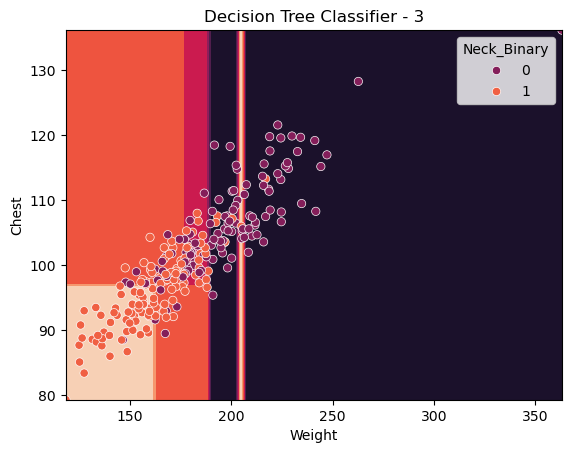

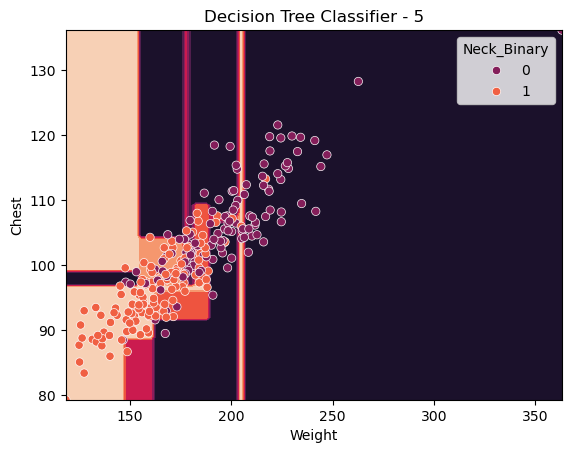

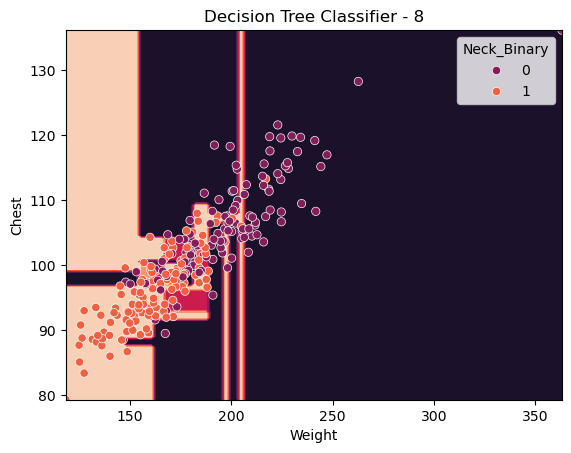

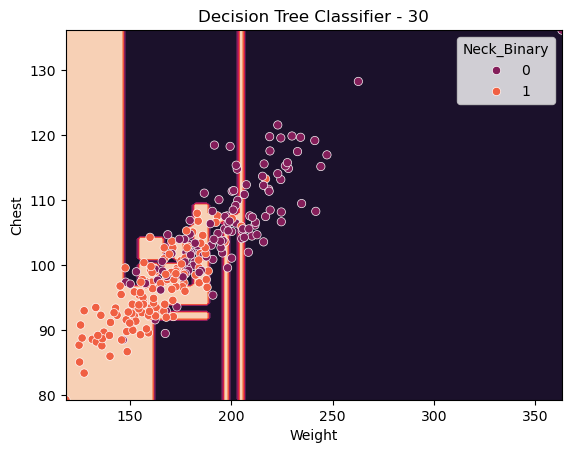

In [115]:
DecisionTreeClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=1)
DecisionTreeClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=3)
DecisionTreeClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=5)
DecisionTreeClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=8)
DecisionTreeClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=30)

In [109]:
def KNeighborsClassifierFunc(data, x, y, label, depth):
    model = KNeighborsClassifier(n_neighbors=depth)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    xlim = (data[x].min(), data[x].max())
    ylim = (data[y].min(), data[y].max())
    model.fit(data.loc[:,[x,y]], data[label])
    grid_x = np.linspace(*xlim, 100)
    grid_y = np.linspace(*ylim, 100)
    xx, yy = np.meshgrid(grid_x, grid_y)
    grid = np.c_[xx.ravel(), yy.ravel()]
    # в следующей строчке с помощью функции isinstance хорошо бы проверить тип объекта model и в зависимости от этого вызывать метод predict, predict_proba или decision_function
    prediction = model.predict_proba(grid)[:,1].reshape(xx.shape)
    ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

    ax.set_title(f'KNeighbors Classifier - {depth}')
    
    ax = sns.scatterplot(data=data, x=x, y=y, hue=label, palette="rocket", ax=ax)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
# Обучение и кросс-валидация для KNeighborsClassifier
knn_scores = []
for n_neighbors in knn_parameters:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_scaled, y, cv=5)
    knn_scores.append(scores.mean())

for i in range(n):
    print(f'{i+1:3} | {knn_scores[i]:.5f}')

  1 | 0.71459
  2 | 0.65075
  3 | 0.76196
  4 | 0.72627
  5 | 0.76988
  6 | 0.76988
  7 | 0.77388
  8 | 0.78204
  9 | 0.78588
 10 | 0.80173
 11 | 0.78588
 12 | 0.78965
 13 | 0.80565
 14 | 0.80173
 15 | 0.81373
 16 | 0.80173
 17 | 0.79396
 18 | 0.79373
 19 | 0.80173
 20 | 0.80173
 21 | 0.80180
 22 | 0.80580
 23 | 0.80180
 24 | 0.80573
 25 | 0.79780
 26 | 0.79388
 27 | 0.80580
 28 | 0.79788
 29 | 0.79796
 30 | 0.80573
 31 | 0.79796
 32 | 0.80973
 33 | 0.79788
 34 | 0.79788
 35 | 0.79788
 36 | 0.79796
 37 | 0.80580
 38 | 0.79788
 39 | 0.80580
 40 | 0.80196
 41 | 0.79796
 42 | 0.80196
 43 | 0.80188
 44 | 0.80188
 45 | 0.80188
 46 | 0.80180
 47 | 0.80180
 48 | 0.79788
 49 | 0.79388
 50 | 0.80988
 51 | 0.80188
 52 | 0.80988
 53 | 0.80588
 54 | 0.80980
 55 | 0.80588
 56 | 0.80588
 57 | 0.80580
 58 | 0.80580
 59 | 0.80580
 60 | 0.80980
 61 | 0.80188
 62 | 0.80196
 63 | 0.79396
 64 | 0.79796
 65 | 0.78996
 66 | 0.79788
 67 | 0.80988
 68 | 0.80596
 69 | 0.80988
 70 | 0.80596
 71 | 0.80596
 72 | 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


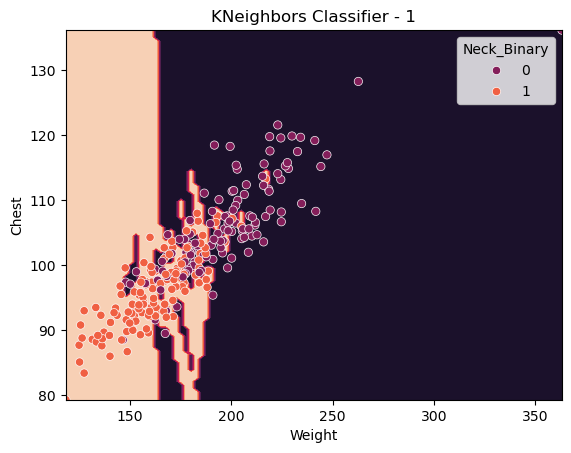

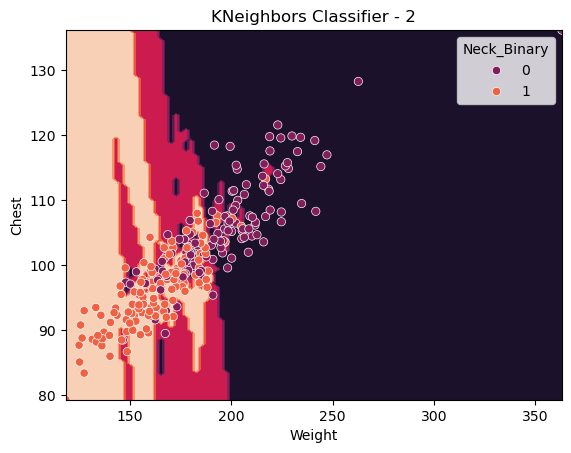

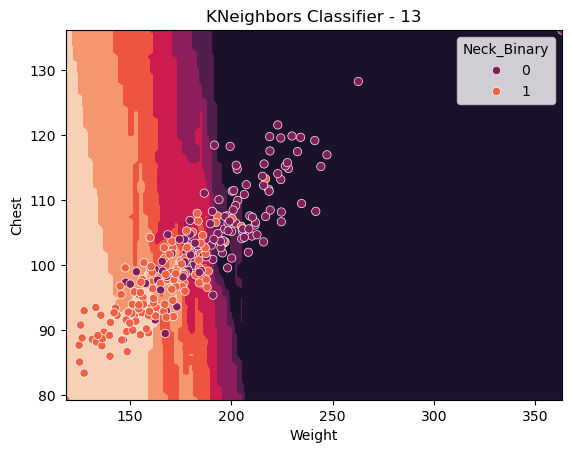

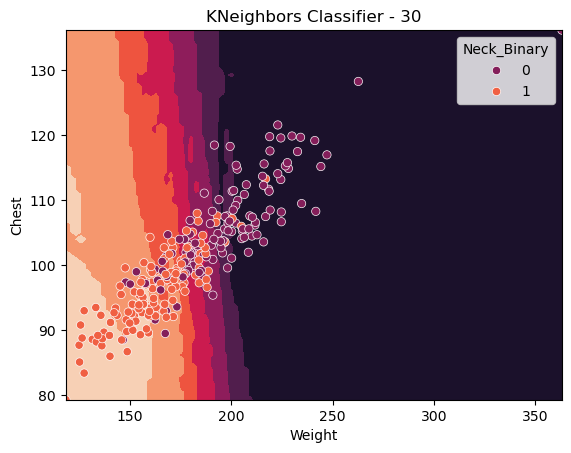

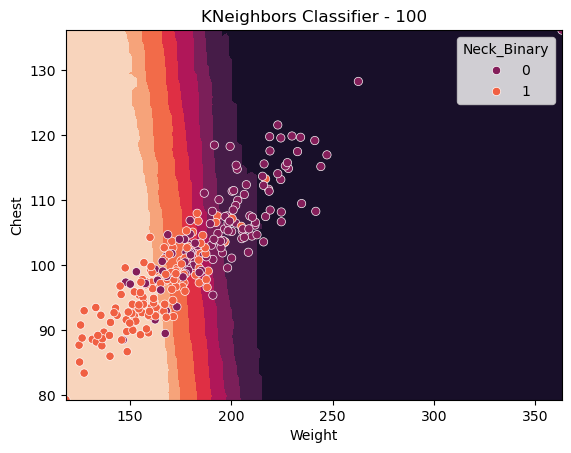

In [113]:
KNeighborsClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=1)
KNeighborsClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=2)
KNeighborsClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=13)
KNeighborsClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=30)
KNeighborsClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=100)

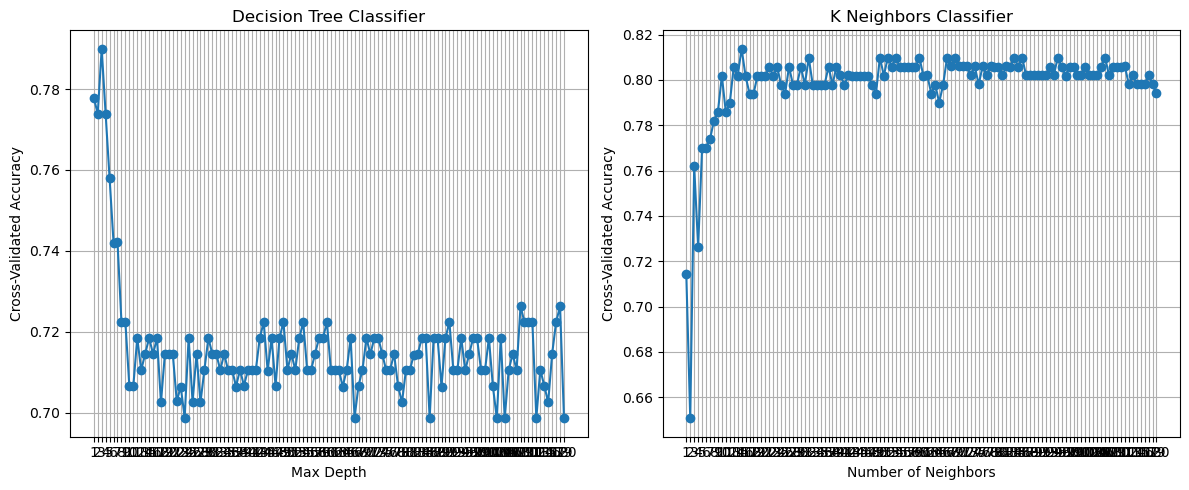

In [65]:
# Построение графиков
plt.figure(figsize=(12, 5))

# Decision Tree
plt.subplot(1, 2, 1)
plt.plot(dtc_parameters, dtc_scores, marker='o')
plt.title('Decision Tree Classifier')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(dtc_parameters)
plt.grid()

# K Neighbors
plt.subplot(1, 2, 2)
plt.plot(knn_parameters, knn_scores, marker='o')
plt.title('K Neighbors Classifier')
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(knn_parameters)
plt.grid()

plt.tight_layout()
plt.show()

* Постройте карты работы метода опорных векторов с разными ядрами (sklearn.svm.SVC, для рисования предсказания используйте метод decision_function)

* Сравните карты работы линейной регрессии sklearn.linear_model.LinearRegression (метод predict) с картой линейного алгоритма классификации sklearn.linear_model.LogisticRegression (метод predict_proba). Уменьшите размер выборки так, чтобы карты отличались. Выясните и запишите в отчете, как и почему отличаются линейные алгоритмы

* Постройте карту работы композиции деревьев sklearn.ensemble.ExtraTreesClassifier (метод predict_proba). Является ли он переобученным? Напишите в комментариях обоснование вашего ответа на этот вопрос.

## 2. Метрики качества

* Для логистической регрессии предскажите вероятности класса 1 для всех объектов *полной* выборки. Постройте на одном графике разными полупрозрачными цветами нормированные гистограммы вероятностей для обоих целевых классов (см. ниже "полезные кусочки кода"). Найдите визуально наилучшее пороговое значение вероятности, которое отделяет один класс от другого.

* Запрограммируйте функцию, которая вычисляет [метрики качества](https://en.wikipedia.org/wiki/Confusion_matrix): матрицу ошибок, Accuracy, TPR, FPR, TNR, FNR, Precision, Recall, F1-меру, Selectivity, Specificity, Balanced accuracy, Adjusted balanced accuracy (sklearn.metrics.balanced_accuracy_score). Сравнивая качество логистической регрессии для разных пороговых значений и разных размеров подвыборки вашего датасета, найдите и опишите недостатки метрик качества. Какие метрики качества на вашем датасете оказались лучшими (имеющими меньше всего недостатков)?

* Прикрепите в Moodle ваш ноутбук и ссылку на ваш отчет (его нужно расшарить всем для чтения кнопкой Share)

## Варианты датасетов:
1. [Hepatitis C Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset) (целевой признак: пол пациента)
2. [Russian Demography Data](https://www.kaggle.com/datasets/dwdkills/russian-demography) (целевой признак: year<=2004)
3. [House prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv) (целевой признак: LotArea<=9480)
4. [Cryptocurrency Closing Price Prediction](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction/data) (целевой признак: volatility<=0.013, удалите все строки, где не задана volatility)
5. [Video Game Sales](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings) (целевой признак: Rating==E)
6. [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) (целевой признак: Amount<=22)
7. [Pokemon Dataset with Team Combat](https://www.kaggle.com/code/tuannguyenvananh/descriptive-analysis-pokemon-eda-feat-satoshi/data?select=pokemon.csv) (целевой признак: Legendary)
8. [TMDB 5000 Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv) (целевой признак: revenue>19млн)
9. [Body Fat Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset) (целевой признак: Neck<=38)
10. [Chess Game Dataset](https://www.kaggle.com/datasets/datasnaek/chess?select=games.csv) (целевой признак: winner==white)
11. [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) (целевой признак: residual sugar <= 2.2)
12. [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) (целевой признак: пол)
13. [Car Price Prediction Multiple Linear Regression](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction) (целевой признак: horsepower <= 100)
14. [Body performance Data](https://www.kaggle.com/datasets/kukuroo3/body-performance-data) (целевой признак: возраст <= 40)
15. [World Happiness Report](https://www.kaggle.com/datasets/unsdsn/world-happiness) (целевой признак: Family <= 1)
16. [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams) (целевой признак: lunch)
17. [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) (целевой признак: возраст <= 30)
18. [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) (целевой признак: MaritalStatus==Married - бинарная классификация)
19. [Acoustic Extinguisher Fire Dataset](https://www.kaggle.com/datasets/muratkokludataset/acoustic-extinguisher-fire-dataset) (целевой признак: FUEL==gasoline - бинарная классификация)
20. [Pumpkin Classification : Autoviz](https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset) (целевой признак: Compactness<=0.7)
21. [Dry Bean Dataset](https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset) (целевой признак: Class==DERMASON)
22. [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices) (целевой признак: ocean_proximity == '<1H OCEAN')
23. [Data Science for Good: PASSNYC](https://www.kaggle.com/datasets/passnyc/data-science-for-good?resource=download) (целевой признак: Percent Black <= 40)
24. [Spotify Song Attributes](https://www.kaggle.com/datasets/geomack/spotifyclassification) (целевой признак: acousticness<=0.1)
25. [Real Estate DataSet](https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset) (целевой признак: PTRATIO>=18.84)
26. [Glass Classification](https://www.kaggle.com/datasets/uciml/glass) (целевой признак: Type==2)
27. [Car information dataset](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset) (целевой признак: model_year>=77)
28. [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset) (целевой признак: Sleep Disorder == None)
29. [Другой датасет](https://www.kaggle.com/datasets) по согласованию с преподавателем практики и с изменением целевого признака (**датасеты у всех должны быть разными**). 

## Полезные кусочки кода

### отображение статистики:
```
pd.options.display.max_columns = data.shape[1]
data.describe(include='all')
```

### поиск "сильных" признаков:
```
import seaborn as sns
sns.set(rc={'figure.dpi':300})
label = 'укажите ваш целевой признак'
features = [c for c in data.columns if c != label and data.dtypes[c] != 'object']
X = data.loc[:,features]
y = data[label]
mi = sklearn.feature_selection.mutual_info_classif(X, y)
ax = sns.barplot(x=mi, y=features)
```

### график рассеяния:
```
ax = sns.scatterplot(data=data, x='имя столбца1', y='имя столбца2', hue=label, palette="deep")
```

### карта предсказания классификатора (цвет - вероятность класса 1):
```
x='имя столбца1'; y='имя столбца2'
model = конструктор модели

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (data[x].min(), data[x].max())
ylim = (data[y].min(), data[y].max())
model.fit(data.loc[:,[x,y]], data[label])
grid_x = np.linspace(*xlim, 100)
grid_y = np.linspace(*ylim, 100)
xx, yy = np.meshgrid(grid_x, grid_y)
grid = np.c_[xx.ravel(), yy.ravel()]
# в следующей строчке с помощью функции isinstance хорошо бы проверить тип объекта model и в зависимости от этого вызывать метод predict, predict_proba или decision_function
prediction = model.predict_proba(grid)[:,1].reshape(xx.shape)
ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

ax = sns.scatterplot(data=data, x=x, y=y, hue=label, palette="rocket", ax=ax)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
```

### гистограмма:
```
# здесь предполагается, что предсказанные вероятности сохранены в столбец probability датафрейма data
ax = sns.histplot(data=data, x="probability", hue=label, kde=True)
```